## Experiment 2.1
Consider the Iris flower dataset. It has 4 features - sepal length in cm, sepal width in cm, petal length in cm, petal width in cm.

We will also add 2 other features called artificial_feature_1 and arificial_feature_2 with custom values. 

For 5% of the data samples, we give an extremely large value of artificial_feature_1 and for another 5% of the data samples, an extremely large value of artificial_feature_2. Rest of the samples have value 0 for these features. 

We will define the process of explaning an outlier as the process of identifying the right feature(s) that makes the data sample an outlier.

Given this scenario, we expect artificial_feature_1 to be the explanation when a data sample from the first 5% of data is chosen. Simillarly, artificial_feature_1 as the explanation when any data sample from the second 5% data is chosen. 

In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn import datasets
import random

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Initialize the new features
df['artificial_feature_1'] = 0
df['artificial_feature_2'] = 0

In [3]:
# Set random seed for reproducibility
np.random.seed(1)

# Calculate the number of samples
num_samples = df.shape[0]
num_samples_to_modify = int(num_samples * 0.05)

In [4]:
feature_names = df.columns.tolist()
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'artificial_feature_1',
 'artificial_feature_2']

In [5]:
# Randomly select 5% of the indices for artificial_feature_1
indices_feature_1 = np.random.choice(df.index, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_1 for these indices
df.loc[indices_feature_1, 'artificial_feature_1'] = 10000#  random.randint(10000, 50000)

In [6]:
# Randomly select 5% of the indices for artificial_feature_2, ensuring no overlap
remaining_indices = np.setdiff1d(df.index, indices_feature_1)
indices_feature_2 = np.random.choice(remaining_indices, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_2 for these indices
df.loc[indices_feature_2, 'artificial_feature_2'] = 10000 #random.randint(10000, 50000) 

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),artificial_feature_1,artificial_feature_2
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,10000
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,0
148,6.2,3.4,5.4,2.3,0,0


In [8]:
non_zero_count_feature_1 = (df['artificial_feature_1'] != 1).sum()
non_zero_count_feature_1

150

In [9]:
non_zero_count_feature_2 = (df['artificial_feature_2'] != 1).sum()
non_zero_count_feature_2

150

In [10]:
# ocsvm = OneClassSVMModel(nu=0.12, gamma=0.3)

In [11]:
x_data = torch.tensor(df.values)

In [12]:
x_data.shape

torch.Size([150, 6])

In [13]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.121, gamma=0.3, num_inducing_points=x_data.shape[0])

In [14]:
decision, y_pred = classifier.fit()

In [15]:
classifier.model.decision

array([ 2.29511050e-01, -4.77478830e-05,  2.09718534e-01,  2.09405259e-01,
        2.11657603e-01,  1.20594170e-01,  1.70656621e-01,  2.49853099e-01,
        1.29933606e-01,  2.34096387e-01,  1.62009169e-01,  2.22526820e-01,
        2.16803283e-01, -1.03455625e-05, -5.27531863e-02, -1.22231046e-01,
       -9.71301448e-06,  2.39986358e-01,  3.89098960e-02,  1.82202586e-01,
        1.69153582e-01,  2.08650272e-01, -2.22044605e-16,  2.48886733e-01,
        1.57123795e-01,  2.45301147e-01,  2.60526122e-01,  2.26335362e-01,
        2.24106128e-01,  2.26940674e-01,  2.50743208e-01,  1.89707261e-01,
        4.52808461e-02, -1.03980385e-05,  2.58538462e-01,  2.04778264e-01,
        1.10257912e-01,  1.77518792e-01,  1.17189271e-01, -9.73334159e-06,
        2.23442861e-01, -8.03120903e-03,  9.91298139e-02,  2.09045097e-01,
        1.14578956e-01,  2.50291918e-01,  1.66242467e-01,  1.96360274e-01,
        1.83989961e-01,  2.49854556e-01, -1.07264312e-05,  1.43054896e-01,
        1.52800200e-01,  

In [16]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 124, 'percentage': 82.66666666666667}, -1: {'count': 26, 'percentage': 17.333333333333336}}


In [17]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[1,
 13,
 14,
 15,
 16,
 22,
 33,
 39,
 41,
 50,
 56,
 60,
 62,
 75,
 77,
 98,
 100,
 104,
 106,
 113,
 114,
 117,
 118,
 131,
 134,
 141]

In [18]:
indices_feature_1

array([ 14,  98,  75,  16, 131,  56, 141])

In [19]:
indices_feature_2

array([116, 104, 113,   1,  77, 123,  39])

In [20]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 63/63 [00:13<00:00,  4.69it/s]


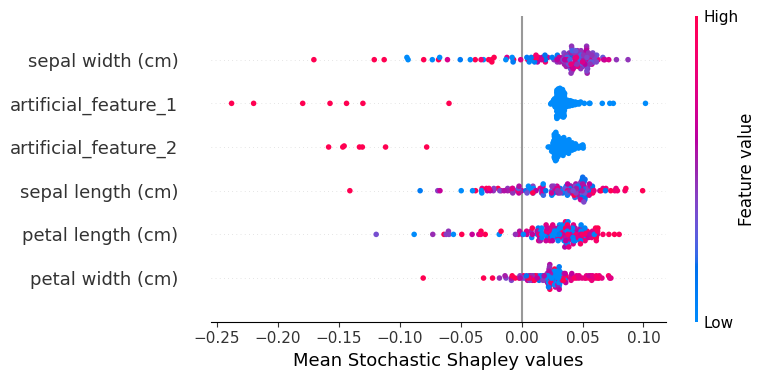

In [21]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot, violin_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

### Problem 1

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/visualisation/deterministic_values.py:25: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025535429/work/aten/src/ATen/native/TensorShape.cpp:3641.)
  return shap.bar_plot(shapley_values.T.numpy(), query_data.numpy(), show=False,


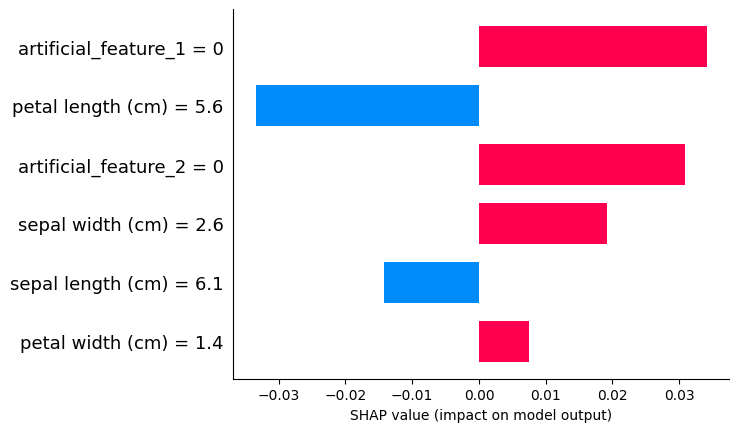

In [22]:
bar_plot(mean_stochastic_shapley_values.T[134], x_data[134], feature_names=feature_names)

In [23]:
x_data[134]

tensor([6.1000, 2.6000, 5.6000, 1.4000, 0.0000, 0.0000], dtype=torch.float64)

Index 134 does not have high values of either artificial_feature_1 or artificial_feature_2.

Why does it have the maximum shapley value for artificial_feature_1 ??

### Problem 2

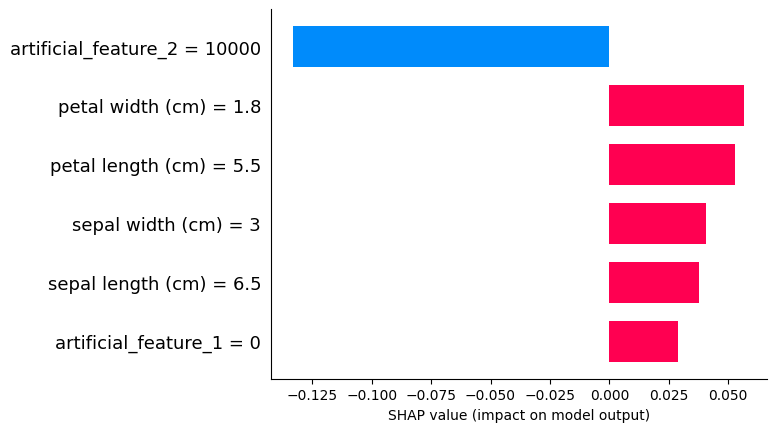

In [24]:
bar_plot(mean_stochastic_shapley_values.T[116], x_data[116], feature_names=feature_names)

In [25]:
x_data[116]

tensor([6.5000e+00, 3.0000e+00, 5.5000e+00, 1.8000e+00, 0.0000e+00, 1.0000e+04],
       dtype=torch.float64)

This data point clearly has a very high artificial_feature_2 which is also depicted by high shapley value for the feature.

But this point is not considered an outlier. Why ??